In [227]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok
from nltk.probability import FreqDist
from pyarabic.araby import tokenize, is_arabicrange, strip_tashkeel
from collections import Counter
import pandas as pd
from wordcloud import WordCloud
import arabic_reshaper
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display

In [228]:
#load Dataset
df=pd.read_csv('../data/Clean_apps_ar_reviews.csv')

# Print Shape of dataset
print('Shape of dataset ',df.shape)
# Print Columns
print(df.columns)

Shape of dataset  (21474, 13)
Index(['UserName', 'Review', 'Score', 'Date/Time', 'thumbsUp', 'Version',
       'app', 'lan_review', 'firstName', 'Gender', 'ReviewLength',
       'words_count', 'Polarity sentiment'],
      dtype='object')


In [229]:
df["app"].value_counts()

tawakkalna    8516
mawid         7641
sehhaty       2264
ubieva        1184
tabaud        1079
tetaman        790
Name: app, dtype: int64

In [230]:
#change the name of the app to sehah according to the publisher
df['app'] = df['app'].replace(['ubieva'],'sehah')

In [231]:
df["app"].value_counts()

tawakkalna    8516
mawid         7641
sehhaty       2264
sehah         1184
tabaud        1079
tetaman        790
Name: app, dtype: int64

### What reviewers do not like about the app?

In [ ]:
#getting the reviews of negative sentiment
data=df[df['Polarity sentiment'] == 'negative']
#toknize reviews
data['tokens'] = data["Review"].apply(tokenize)

In [233]:
#getting data for each app
sehhaty=data[data['app'] == 'sehhaty']
tetaman=data[data['app'] == 'tetaman']
mawid=data[data['app'] == 'mawid']
tabaud=data[data['app'] == 'tabaud']
sehah=data[data['app'] == 'sehah']
tawakkalna=data[data['app'] == 'tawakkalna']

In [234]:
#get most frequent words distribution
mssehhaty = FreqDist(sum(sehhaty['tokens'], []))
mstetaman = FreqDist(sum(tetaman['tokens'], []))
msmawid = FreqDist(sum(mawid['tokens'], []))
mstabaud = FreqDist(sum(tabaud['tokens'], []))
mstawakkalna = FreqDist(sum(tawakkalna['tokens'], []))
mssehah = FreqDist(sum(sehah['tokens'], []))

## Top Words in Negative Reviews of Each App

In [235]:
def wc(name,title):
    app=name['Review']
    text = app
    text = [''.join(sentence) for sentence in text]
    text = ''.join(text)
    reshaped_text = arabic_reshaper.reshape(text)
    arabic_text = get_display(reshaped_text)
    wordcloud = WordCloud(font_path=r'../font/NotoNaskhArabic-Regular.ttf',width=300, height=300, background_color="white").generate(arabic_text)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title)
    return plt.show()

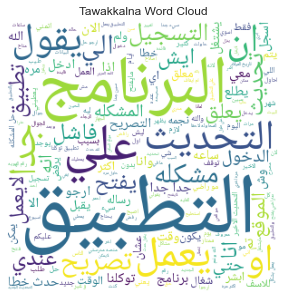

[('التطبيق', 766),
 ('البرنامج', 380),
 ('التحديث', 268),
 ('جدا', 264),
 ('علي', 257),
 ('يعمل', 247),
 ('تطبيق', 243),
 ('المشكله', 204),
 ('التسجيل', 161),
 ('الله', 158),
 ('يفتح', 148),
 ('مشكله', 144),
 ('خطا', 143),
 ('يقول', 141),
 ('تصريح', 141),
 ('فاشل', 133),
 ('مره', 131),
 ('حل', 130),
 ('برنامج', 126),
 ('توكلنا', 125)]

In [257]:
wc(tawakkalna,"Tawakkalna Word Cloud")
mstawakkalna.most_common(20)

*يعلق/التحديث/التسجيل/تصريح
<br>
according to these words we can assume that the users are having problems with the updates/ app freezing/ getting premessions/ and logging in.*

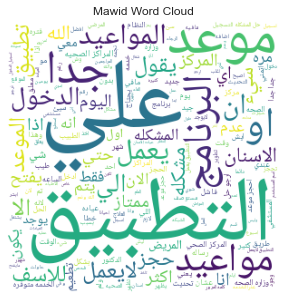

[('التطبيق', 258),
 ('موعد', 147),
 ('علي', 132),
 ('جدا', 119),
 ('يعمل', 93),
 ('البرنامج', 92),
 ('تطبيق', 79),
 ('مواعيد', 69),
 ('المواعيد', 66),
 ('للاسف', 63),
 ('المشكله', 62),
 ('الله', 60),
 ('لايعمل', 58),
 ('او', 57),
 ('الدخول', 56),
 ('الاسنان', 52),
 ('الي', 52),
 ('ان', 52),
 ('سيء', 50),
 ('الصحه', 46)]

In [256]:
wc(mawid,"Mawid Word Cloud")
msmawid.most_common(20)

*الاسنان/المواعيد/الدخول/لايعمل
<br>
according to these words we can assume that the users are having problems with booking appointments/dentist appointments/ and app not working/ and logging in.*

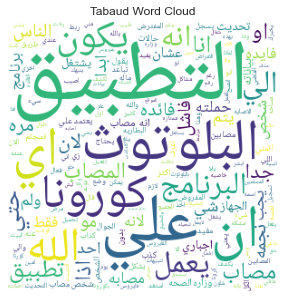

[('التطبيق', 80),
 ('علي', 41),
 ('مصاب', 32),
 ('تطبيق', 31),
 ('ان', 31),
 ('البلوتوث', 29),
 ('البرنامج', 27),
 ('الله', 25),
 ('انه', 25),
 ('كورونا', 24),
 ('اي', 24),
 ('انا', 22),
 ('يعمل', 20),
 ('برنامج', 20),
 ('يكون', 20),
 ('حتي', 19),
 ('الي', 18),
 ('اذا', 17),
 ('او', 16),
 ('فاشل', 16)]

In [260]:
wc(tabaud,"Tabaud Word Cloud")
mstabaud.most_common(20)

*البلوتوث
<br>
according to these words we can assume that the users are having problems with the bluetooth.*

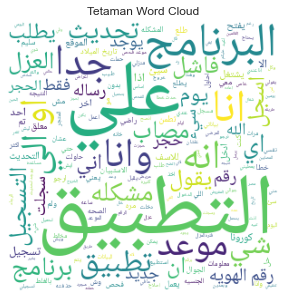

[('التطبيق', 112),
 ('علي', 70),
 ('البرنامج', 58),
 ('تطبيق', 51),
 ('انا', 49),
 ('جدا', 41),
 ('مشكله', 34),
 ('برنامج', 32),
 ('وانا', 29),
 ('رقم', 29),
 ('انه', 29),
 ('موعد', 29),
 ('تحديث', 29),
 ('او', 27),
 ('شي', 26),
 ('يقول', 25),
 ('فاشل', 25),
 ('الي', 24),
 ('يوجد', 23),
 ('العزل', 23),
 ('للاسف', 22),
 ('مصاب', 22),
 ('سيء', 21),
 ('التسجيل', 20),
 ('اي', 20),
 ('سيئ', 19),
 ('سجلت', 19),
 ('خطا', 18),
 ('الهويه', 18),
 ('اسجل', 17)]

In [239]:
wc(tetaman,"Tetaman Word Cloud")
mstetaman.most_common(30)

*التسجيل/تحديث/رقم الهوية
<br>
according to these words we can assume that the users are having problems with the updates / and signing up using ID.**

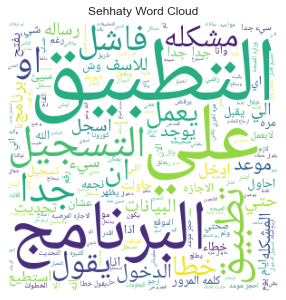

[('التطبيق', 234),
 ('جدا', 176),
 ('تطبيق', 153),
 ('خطا', 126),
 ('البرنامج', 114),
 ('التسجيل', 111),
 ('علي', 110),
 ('يقول', 96),
 ('موعد', 95),
 ('فاشل', 92),
 ('سيء', 79),
 ('للاسف', 65),
 ('مره', 64),
 ('سيئ', 64),
 ('الدخول', 58),
 ('مشكله', 58),
 ('برنامج', 57),
 ('يعمل', 57),
 ('او', 56),
 ('ان', 54),
 ('تسجيل', 53),
 ('المشكله', 52),
 ('الاجازه', 51),
 ('رساله', 49),
 ('احاول', 47),
 ('نجمه', 45),
 ('كلمه', 45),
 ('اسجل', 44),
 ('الخادم', 44),
 ('البيانات', 43)]

In [240]:
wc(sehhaty,"Sehhaty Word Cloud")
mssehhaty.most_common(30)

*الاجازه/تسجيل/موعد/رساله
<br>
according to these words we can assume that the users are having problems with logging in with verification message/ booking appointments/ having as sick leave.*

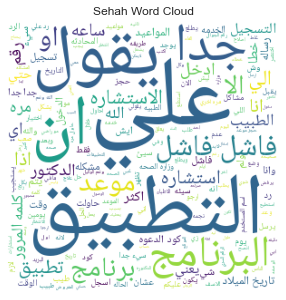

[('فاشل', 80),
 ('جدا', 71),
 ('علي', 63),
 ('التطبيق', 58),
 ('تطبيق', 47),
 ('البرنامج', 44),
 ('برنامج', 42),
 ('موعد', 38),
 ('يقول', 36),
 ('ان', 34),
 ('الله', 32),
 ('سيء', 30),
 ('مره', 28),
 ('كلمه', 24),
 ('للاسف', 24),
 ('ساعه', 24),
 ('او', 23),
 ('خطا', 23),
 ('انا', 23),
 ('الاستشاره', 23),
 ('الي', 22),
 ('اذا', 22),
 ('استشاره', 22),
 ('الا', 22),
 ('رقم', 22),
 ('اي', 21),
 ('تاريخ', 20),
 ('المرور', 20),
 ('كود', 20),
 ('ادخل', 19)]

In [241]:
wc(sehah,"Sehah Word Cloud")
mssehah.most_common(30)

*ساعه/الاستشاره/موعد/المرور/كود
<br>
according to these words we can assume that the users are having problems with response time, consultation, appointments and logging in with verification message.*

## What Reviewers Like About These Apps?

In [ ]:
# Most positive words in reviews 
pos=df[df['Polarity sentiment'] == 'positive']
# tokenizer
pos['token']=pos["Review"].apply(tokenize)
# calculate the most 30 common words
dist = FreqDist(sum(pos['token'], []))

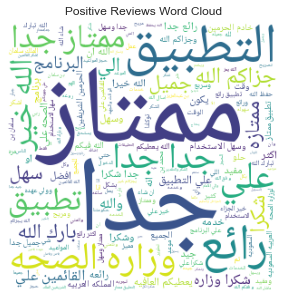

In [243]:
wc(pos,"Positive Reviews Word Cloud")

In [263]:
dist.most_common(50)

[('الله', 3808),
 ('ممتاز', 3338),
 ('جدا', 2963),
 ('علي', 1876),
 ('تطبيق', 1856),
 ('شكرا', 1428),
 ('رائع', 1201),
 ('التطبيق', 1043),
 ('الصحه', 871),
 ('خير', 770),
 ('جميل', 693),
 ('برنامج', 691),
 ('سهل', 593),
 ('وسهل', 591),
 ('ممتازه', 574),
 ('وزاره', 548),
 ('ان', 548),
 ('البرنامج', 459),
 ('جزاكم', 422),
 ('القائمين', 401),
 ('خدمه', 391),
 ('جيد', 379),
 ('الاستخدام', 368),
 ('الوقت', 341),
 ('الي', 327),
 ('اكثر', 319),
 ('والله', 317),
 ('العافيه', 295),
 ('بارك', 293),
 ('يعطيكم', 267),
 ('المواعيد', 250),
 ('السعوديه', 249),
 ('تجربه', 243),
 ('رائعه', 237),
 ('الشكر', 235),
 ('خيرا', 230),
 ('مفيد', 227),
 ('افضل', 223),
 ('اللهم', 221),
 ('ومفيد', 215),
 ('الجميع', 212),
 ('المملكه', 212),
 ('حجز', 210),
 ('عنا', 208),
 ('وشكرا', 205),
 ('يارب', 205),
 ('فيكم', 203),
 ('جهودكم', 200),
 ('حلو', 180),
 ('موعد', 179)]

*الاستخدام/سهل/جميل/حلو/ومفيد
<br>
according to these words we can assume that the users like the look of the app, usefulness, and ease of use*

### Change of scores over the years?

[Text(0.5, 1.0, 'Change in Score from 2017 to 2021')]

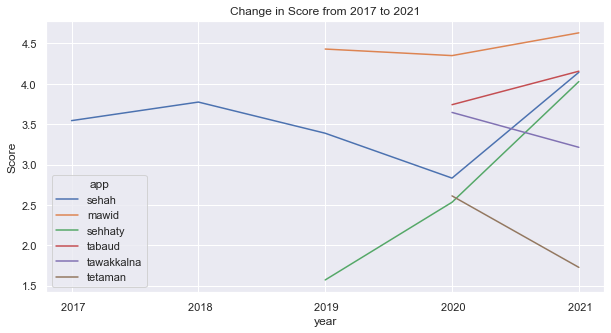

In [244]:
df['year']=df['Date/Time'].str.split('-').str[0]
df1 =df.groupby(['year', 'app'], as_index=False).mean()
df2=df1[df1["year"].str.len() == 5]
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(data=df2, x="year", y="Score", hue="app").set(title='Change in Score from 2017 to 2021')

*Most of the apps have increased since 2020 except for tawakkalna and tatamen, and that can be due to logging in problems we discovred earlier as it seems like a major problems for these two apps.*

## The Distribution of Reviews and Scores

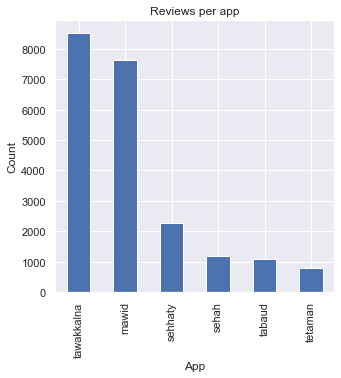

In [245]:
# Number of reviews per app
ax = df['app'].value_counts().plot(kind='bar',figsize=(5,5),title="Reviews per app")
ax.set_xlabel('App')
ax.set_ylabel('Count');

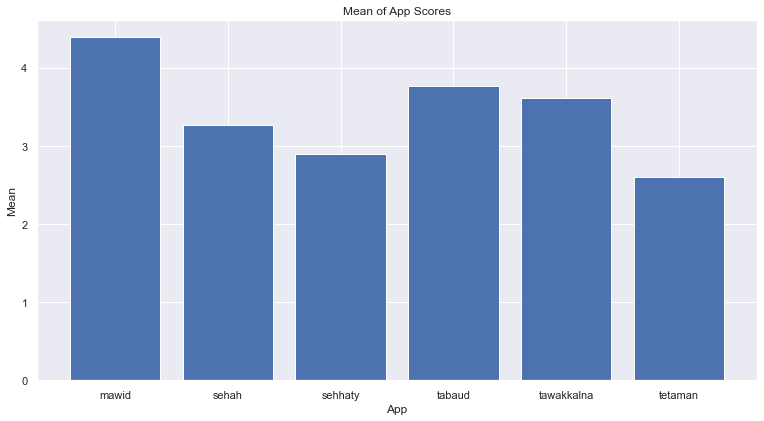

In [246]:
data = df.groupby("app").mean().reset_index(level=[0])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Mean')
ax.set_xlabel('App')
ax.set_title('Mean of App Scores')
ax.bar(data['app'], data['Score'])
plt.show()

*Though most of the reviews is about tawakkalna, mawid got an over all higher score than tawakkalna. While tetamen is the app the users are least satisfied with.*

### General EDA

In [247]:
data = df.groupby("Polarity sentiment").mean().reset_index(level=[0])
data

,Polarity sentiment,Score,thumbsUp,ReviewLength,words_count
0,negative,2.187041,3.731928,66.358626,11.901015
1,neutral,2.816381,6.105905,88.723810,15.682286
2,positive,4.774188,1.653327,49.428962,8.507875


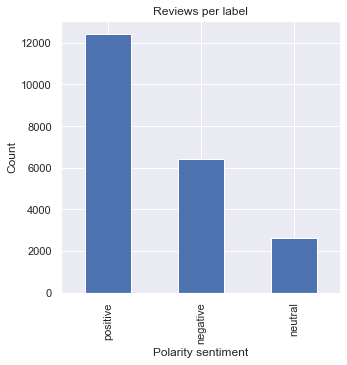

In [248]:
# Number of reviews per label
ax = df['Polarity sentiment'].value_counts().plot(kind='bar',figsize=(5,5),title="Reviews per label")
ax.set_xlabel('Polarity sentiment')
ax.set_ylabel('Count');

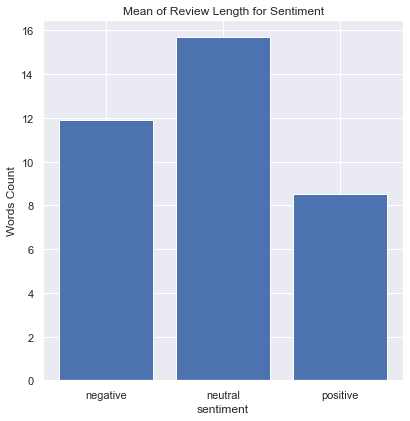

In [249]:
data = df.groupby("Polarity sentiment").mean().reset_index(level=[0])
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Words Count')
ax.set_xlabel('sentiment')
ax.set_title('Mean of Review Length for Sentiment')
ax.bar(data['Polarity sentiment'], data['words_count'])
plt.show()

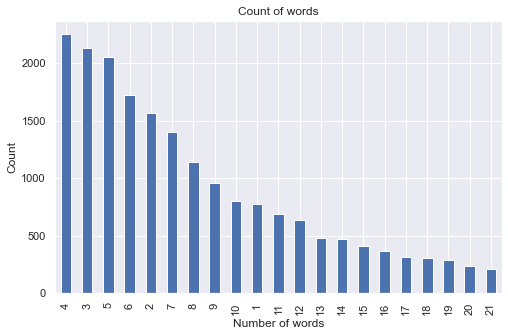

In [250]:
data=df[df['Polarity sentiment'] == 'positive']
ax = df['words_count'].value_counts().plot(kind='bar',figsize=(8,5),title="Count of words")
ax.set_xlabel('Number of words')
ax.axis(xmin=-0.5,xmax=20.5)
ax.set_ylabel('Count');

*Though we have more positive reviews, negative and neutral reviews are on average way more lengthy. Moreover, most of the positive reviews are 1-2 words with less details to observe*


## Who Gives More detailed Reviews?

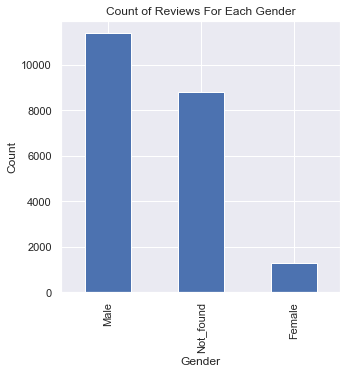

In [251]:
# Number of reviews for each gender
ax = df['Gender'].value_counts().plot(kind='bar',figsize=(5,5),title="Count of Reviews For Each Gender")
ax.set_xlabel('Gender')
ax.set_ylabel('Count');

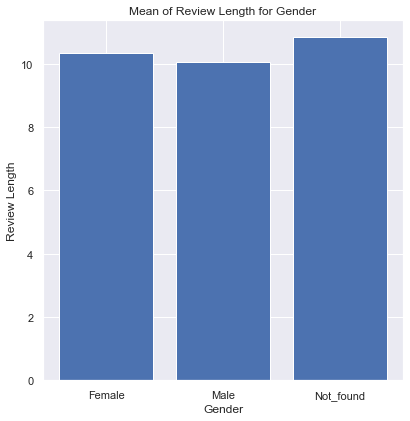

In [252]:
# Females give more detaled reviews
data = df.groupby("Gender").mean().reset_index(level=[0])
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Review Length')
ax.set_xlabel('Gender')
ax.set_title('Mean of Review Length for Gender')
ax.bar(data['Gender'], data['words_count'])
plt.show()

*Males make the majority of users reviewing apps. looking at the average review length of both genders, however, famales give more detailed reviews. Thus, user experience researchers might need to get more feedbacks from females and more detailed reviews from males.*

### Reading top negative reviews

In [253]:
# with high thumbs up and written by females
df=pd.read_csv('../data/apps_ar_reviews_dataset.csv')
data=df[(df['Polarity sentiment'] == 'negative') & (df["Gender"] == 'Female') &(df['thumbsUp'] >=3) &(df['app'] =='mawid') ]
pd.options.display.max_colwidth = 1000  # set a value as your need
data['Review']

1027                                                                                                                      موقادرة أسجل موعد بعيادات المستشفى العام في منطقتي.. فقط يظهر لي عيادات المراكز الصحية.. اما المستشفى فلا تظهر لي مواعيدنا فيه لنتمكن من تعديلها.. والعيادات فيه لا تظهر لي الا عيادة الكشف قبل الزواج... مالحل؟ 
1178                                                                                                                                           التطبيق لا يعمل. يرجى العمل على حل المشكله و ايضا لا يجي التطبيق يقول المواعيد فل و تروح المركز الصحي فاضي و لا احد يدخل على الاطباء؟!! عجيب الامر، ليه مافيه متابعه دقيقه من وزارة الصحه؟؟ 
1367     مواعيد على قلت سنع احجز موعد اسنان يصرفني يقول لي مافي الا طورائ المواعيد في خطا البرنامج تعال بعد العيد واتفاجي تجيني رساله عدم حضور الموعد وبعد العيد احجز يقولون مافي طورائ ليش تعطوني اجل مواعيد ناهيك عن التحويل من مستشفى لمستشفى في الاخير خساير ادفع من جيبي مستوصف خاص ولا مواعيدهم الواحد يموت ويجي موعده ولا يستفيد شي 
9350

In [254]:
# with high thumbs up and written by males
data=df[(df['Polarity sentiment'] == 'negative') & (df["Gender"] == 'Male') &(df['thumbsUp'] >=10) &(df['app'] =='mawid') ]
pd.options.display.max_colwidth = 1000  # set a value as your need
data['Review']

971         المواعيد لا تتوفر لدى المريض إلا في اليوم الذي بعده ونادراً يكون الموعد في اليوم التالي و ذلك في مدينة الرياض و الاحياء الياسمين و الملقا و مركز الياسمين تحديداً عند الذهاب لمركز الياسمين كحالة اسعافيه طارئه بسبب عدم توفر موعد قريب يتم وضعها في الإنتظار وعدم مبالاة بتدهور صحة المريض .. نأمل تحديد المواعيد في اوقات قريبه ؟ مع جزيل الشكر تحديث: 16/1/2021 حتى في اليوم الذي بعده اصبح لا يوجد موعد في عيادة طب الأسرة؟! المشكله هذي لها سنوات و عند الحضور لمركز صحي الياسمين لا نجد مراجعين إلا قليل!؟! 
1034                                                                                                                                                                                                                                                                                                                                                             على الرغم من طلب التطبيق عملية التحديث .. إلا أنه مع ذلك أصبح رديئا جدا ولا يفتح للدخول !! ترجى المعالجة بشكل عاجل .. وفي حال بقائه على 